In [ ]:
import random
from recsys.recommender import RecSys, Patient, Protocol
from simulation import Simulator
from typing import Dict, List
import matplotlib.pyplot as plt

### 1.Initilization

In [2]:
# 1. Define protocols
profile = ["Executive/visuospatial", "Naming", "Attention", "Language", "Abstraction", "Recall", "Orientation"]
possible_dms = ["Speed", "Size", "Length", "Accuracy", "Strength", "Endurance"]
possible_game_modes = ["STANDARD", "DIRECT", "INVERSE_REFERENCE"]

num_protocols = 15
protocols = []
for i in range(1, num_protocols+1):  # Sequential IDs from 1 to 20
    dms = random.sample(possible_dms, random.randint(2, 5))  # Sample 2-5 dms
    game_modes = random.sample(possible_game_modes, random.randint(1, 3))  # Sample 2-5 dms
    profile_values = [random.random() for _ in profile]  # Sample 2-5 dms
    ar = random.choice([True, False])  # 50% chance for ar
    protocol = Protocol(
        id=f"{i}",
        name=f"Protocol {chr(64 + i)}",  # Names like "Protocol A", "Protocol B", etc.
        profile={p: value for p, value in zip(profile, profile_values)},
        game_modes=game_modes,
        dms=dms,
        ar=ar
    )
    protocols.append(protocol)

In [3]:
# 2. Define patient
profile_values = [random.random() for _ in profile]

patient = Patient()
patient.profile = {p: value for p, value in zip(profile, profile_values)}

def generate_random_ground_truth(protocols: List[Protocol], low: int = 0.8, high: int = 0.9):
    ground_truth: Dict[str, List[float]] = {}
    for protocol in protocols:
        # Generate target DM values based on the number of DMs in the protocol
        target_dms = [round(random.uniform(low, high), 2) for _ in protocol.dms]
        ground_truth[str(protocol.id)] = target_dms
    return ground_truth

patient.dm_ground_truth = generate_random_ground_truth(protocols)

In [4]:
# Define simulator
recsys = RecSys(protocols)
simulator = Simulator(recsys)

In [ ]:
# Run sessions
num_days = 101
for day in range(0, num_days+1):
    simulator.use_recommendations(patient)

INFO:root:Simulating session for protocol 2: Protocol B
INFO:root:Simulating session for protocol 4: Protocol D
INFO:root:Simulating session for protocol 6: Protocol F
INFO:root:Simulating session for protocol 12: Protocol L
INFO:root:Simulating session for protocol 15: Protocol O
INFO:root:Simulating session for protocol 1: Protocol A
INFO:root:Simulating session for protocol 3: Protocol C
INFO:root:Simulating session for protocol 5: Protocol E
INFO:root:Simulating session for protocol 8: Protocol H
INFO:root:Simulating session for protocol 11: Protocol K
INFO:root:Simulating session for protocol 3: Protocol C
INFO:root:Simulating session for protocol 9: Protocol I
INFO:root:Simulating session for protocol 13: Protocol M
INFO:root:Simulating session for protocol 14: Protocol N
INFO:root:Simulating session for protocol 15: Protocol O
INFO:root:Simulating session for protocol 2: Protocol B
INFO:root:Simulating session for protocol 4: Protocol D
INFO:root:Simulating session for protocol 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


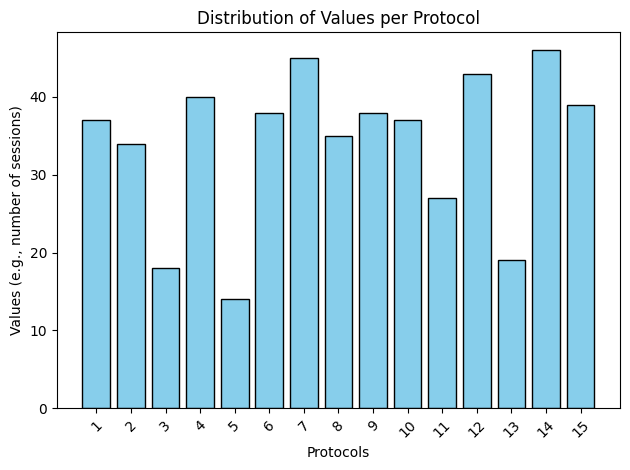

In [7]:
protocol_dist = patient.compute_for_protocols(protocols=protocols,
                              logic=lambda x: len(x),
                              default_value=0)
# Create bar plot
plt.bar(protocol_dist.keys(), protocol_dist.values(), color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Protocols")
plt.ylabel("Values (e.g., number of sessions)")
plt.title("Distribution of Values per Protocol")

# Customize x-axis
plt.xticks(rotation=45)  # Rotate x-tick labels for readability

# Show plot
plt.tight_layout()
plt.show()